2024-12-04 14:15:46.110302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733321746.126496 3467896 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733321746.131421 3467896 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 14:15:46.148273: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



------------------------------------------------------

ROWS and COLUMNS of the start data: (7418, 5)
Size of the data to be processed :  1238
Percentage of data that will be processed:  17%
--------------------------------------------------------


Total Number of Words in the Index:  19109
Number of CLASSES/LABELS:  62
Number of Train data:  866
Number of test Data:  372
Epoch 1/30


/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-12-04 14:15:47.885661: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0428 - loss: 4.0875 - val_accuracy: 0.0753 - val_loss: 4.0126
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0648 - loss: 3.8287 - val_accuracy: 0.0753 - val_loss: 3.8457
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1047 - loss: 3.5112 - val_accuracy: 0.0753 - val_loss: 3.7727
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1744 - loss: 3.4984 - val_accuracy: 0.0887 - val_loss: 3.8001
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1683 - loss: 3.0355 - val_accuracy: 0.0699 - val_loss: 3.9288
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3415 - loss: 2.4363 - val_accuracy: 0.1102 - val_loss: 4.1871
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4899 - loss: 1.9106 - val_accuracy: 0.0860 - val_loss: 4.4752
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7079 - loss: 1.2482 - val_accuracy: 0.0806 - val_loss: 5.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         4,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,012,796 (15.31 MB)

 Trainable params: 1,337,598 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,675,198 (10.21 MB)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1054 - loss: 8.6028
Test Loss: 8.5591
Test Accuracy: 11.2903
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step



Number of words predicted correctly is:  42


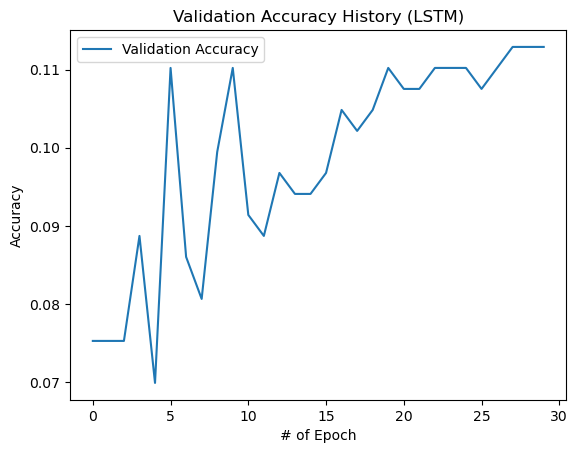

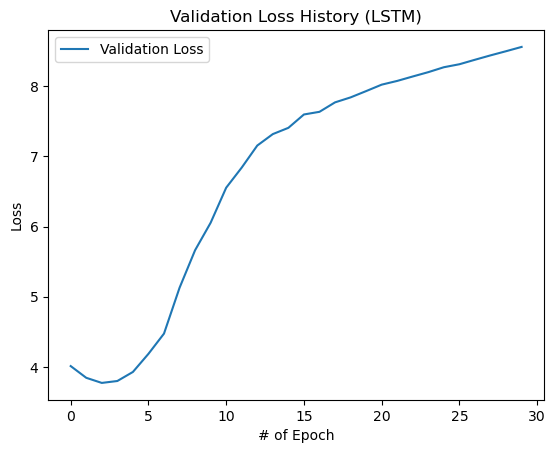



 ************** THE END ***************


In [1]:
import gensim
import numpy as np
import pandas as pd
import tensorflow
import reusables as ru
import matplotlib.pyplot as plt
from importlib import reload
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,  Flatten, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from gensim.models.keyedvectors import KeyedVectors

# --------------------------------------------------------------------------------------------------------------------
# Load the CSV
word2vec_file = 'GoogleNews-vectors-negative300.bin'
file_path = "../DATA/subject_headings_after_cleanup_without_blanks.csv"
lstm_model_file = 'lstm_model.keras'

# Read the raw file
df = pd.read_csv(file_path)

# Variables 
NUMBER_OF_WORDS=10000
OUTPUT_DIM=128
EPOCH = 30
TEST_SIZE = 0.3
BATCH_SIZE = 16
MAX_LENGTH = 100
LOSS = 'categorical_crossentropy'
SUBSET=10

# Column to process
COLUMN_TO_PROCESS =['Title', 'Abstract', 'Subject Headings']

# filter the college
filter_by_college = 'ALL'
#filter_by_college = 'College of Education'
#filter_by_college = 'College of Engineering and Computer Science'
#filter_by_college = 'College of Science'

if filter_by_college != 'ALL':
    # Filter the data
    selected_data = df[df['College'] == filter_by_college ].reset_index(drop=True)
else:
    selected_data = df

# pull records that have subject headings greater than n
selected_data = ru.get_df_subset(selected_data, SUBSET)

# selected the Abstract and Heading columns
selected_data = selected_data[COLUMN_TO_PROCESS]
    
# --------------------------------------------------------------------------------------------------------------------
# Retrieve the data from the dataframe into arrays
reload(ru)

abstracts = selected_data['Title'].astype(str).values + " " + selected_data['Abstract'].astype(str).values
headings = selected_data['Subject Headings'].astype(str).values

# print summary
ru.data_info(df, selected_data, abstracts, headings)

# Map labels to integers
heading_to_int = {heading: idx for idx, heading in enumerate(set(headings))}
int_headings = [heading_to_int[heading] for heading in headings]

# Tokenize the titles
tokenizer = Tokenizer(num_words=NUMBER_OF_WORDS)
abstracts_padded, word_index = ru.encode_abstract(abstracts, tokenizer, MAX_LENGTH)
print("\nTotal Number of Words in the Index: ", len(word_index))

# Encode the headings
label_encoder = LabelEncoder()
label_encoded_to_int = ru.encode_label(headings, label_encoder)
num_classes = len(label_encoder.classes_)

# Convert headings to one-hot encoding
headings_encoded = to_categorical(label_encoded_to_int, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(abstracts_padded, headings_encoded, test_size=TEST_SIZE, random_state=42)

print("Number of CLASSES/LABELS: ", num_classes)
print("Number of Train data: ", len(y_train))
print("Number of test Data: ",len(y_test))


# Retrieve word2vec Embedding
#embedding_dim, embedding_matrix = ru.get_word2vec_embedding(word2vec_file, tokenizer, NUMBER_OF_WORDS)

# -------------------------------------------------------------------------------------------------------------------
# Define the LSTM model

model = Sequential()
model.add(Embedding(input_dim=NUMBER_OF_WORDS, output_dim=OUTPUT_DIM, input_length=MAX_LENGTH))
#model.add(Embedding(input_dim=NUMBER_OF_WORDS, output_dim=embedding_dim, weights=[embedding_matrix],  trainable=False))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss=LOSS, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

# Summary Table
model.summary()

#save the model to a file
#model.save(lstm_model_file)

# -------------------------------------------------------------------------------------------------------------------
# Evaluate the model on the test set

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {100 * accuracy:.4f}")

# Predicting on the test set
ru.predict_this(X_test, y_test, label_encoder, model)

# Plot Accuracy

Sign in

ru.plot_this('val_accuracy', 'Validation Accuracy History (LSTM)', 'Validation Accuracy',  '# of Epoch', 'Accuracy', history)

# Plot Loss
ru.plot_this('val_loss', 'Validation Loss History (LSTM)', 'Validation Loss', '# of Epoch', 'Loss', history)

print ("\n\n ************** THE END ***************")
